In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
s_data = pd.read_csv("C:/Users/LENOVO/Downloads/student/student-por.csv")

In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
s_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Checking Linearity

In [6]:
# Fitting the linear model
s_data.loc[s_data['schoolsup'] =='yes', 'schoolsup1'] = 1
s_data.loc[s_data['famsup'] =='yes', 'famsup1'] = 1
s_data.loc[s_data['paid'] =='yes','paid1'] = 1
s_data.loc[s_data['activities'] =='yes','activities1'] = 1
s_data.loc[s_data['nursery'] =='yes', 'nursery1'] = 1
s_data.loc[s_data['higher'] =='yes', 'higher1'] = 1
s_data.loc[s_data['internet'] =='yes', 'internet1'] = 1
s_data.loc[s_data['romantic'] =='yes', 'romantic1'] = 1
s_data.loc[s_data['schoolsup'] =='no', 'schoolsup1'] = 0
s_data.loc[s_data['famsup'] =='no', 'famsup1'] = 0
s_data.loc[s_data['paid'] =='no','paid1'] = 0
s_data.loc[s_data['activities'] =='no','activities1'] = 0
s_data.loc[s_data['nursery'] =='no', 'nursery1'] = 0
s_data.loc[s_data['higher'] =='no', 'higher1'] = 0
s_data.loc[s_data['internet'] =='no', 'internet1'] = 0
s_data.loc[s_data['romantic'] =='no', 'romantic1'] = 0
s_data.head()
s_data.tail()
x= s_data.iloc[:, [12,13,14,33,34,35,36,37,38,39,40,23,24,25,26,27,28,29,30,31]].values  
y= s_data.iloc[:,32].values

In [8]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)

In [10]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test

array([ 8, 15, 16, 10, 10, 12, 13, 17, 12, 12, 11, 10, 13,  8, 18, 12, 13,
       13, 10, 10, 12, 10, 17, 15, 14,  0, 12, 14, 12,  9, 13, 16, 13, 16,
       12, 10, 10, 11, 13, 10, 15, 18, 11, 13, 13, 10, 14,  9, 11, 10,  8,
       17,  9, 13,  8, 11, 12, 12, 15, 15, 13,  7, 12, 10, 12, 12, 11, 13,
       14,  8,  9, 11, 13, 11, 14, 13, 14, 13, 13, 13, 14, 11, 10, 14, 17,
       13, 10, 12, 13, 10, 12, 16, 17, 11,  6, 11, 14, 11, 13, 15, 14, 10,
        8, 11, 10, 12, 17, 11,  9, 15, 12, 13, 14, 14, 12, 11, 15, 16, 10,
       12,  8, 11, 11, 11, 14, 15, 14, 15, 10, 11, 12,  7, 17, 13, 12, 10,
        0,  0, 12, 11, 15, 10, 10, 12, 16, 12,  7, 14, 17, 13, 17, 13, 13,
       11, 12, 14, 16, 11,  9, 18, 14, 16, 11], dtype=int64)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_train)

In [12]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.8492595763614205


In [13]:
print(y_pred)

[13.14249732 11.34875358 11.66206475 10.79923648  8.34679606  9.36592038
 10.3956679   8.82153884 14.42909588 15.50380235 16.70639869 14.75627852
  7.10403901 12.41743697 15.53948451  7.69600685  6.87370561 13.30877569
 16.34409616 10.79531696  7.64654154  7.98822343  8.84973291  9.46788563
  9.6631067  12.52717369 10.42611234  6.68008513 18.62853825  8.01196003
 11.28564264  9.89014288  9.57355292 10.46735205  9.25044727 12.23634273
 10.42336029  8.33887363 13.54332947 12.60787608 10.95938442  0.52064222
  8.21894585 15.24912213  9.63249961 14.69121807 14.46717542 14.08192976
 18.5556095   9.90141345 15.36450327  9.5739419  13.25905672 13.32849947
 11.32249111 11.0719181  10.33292058 12.58476619 13.28799099 13.65702789
 14.79111687  7.45944648 11.47135551 13.51149425  7.06334023 12.5159551
 17.49391229  9.93625648  6.99944966 15.5311026  12.58698288 12.34967149
 10.40306349 14.89018601  9.30939164 14.64855899 17.32842044  6.15428917
 12.65843692 14.52356236 12.30651108  9.20920619  5.

In [14]:
residuals = y_train-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.

Mean of Residuals 7.310110450206792e-17


Checking Homoscedasticity

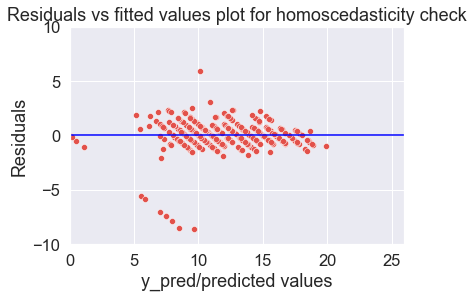

In [15]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking heteroscedasticity

In [17]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.6292377160709991), ('p-value', 0.9997088731998438)]

In [18]:
from scipy.stats import bartlett
test = bartlett(x_train[0],residuals)
print(test)

BartlettResult(statistic=3.436514379832577, pvalue=0.0637700969545339)


In [19]:
from scipy.stats import bartlett
test = bartlett(x_train[1],residuals)
print(test)

BartlettResult(statistic=1.960687602817785, pvalue=0.16143979967766972)


In [20]:
from scipy.stats import bartlett
test = bartlett(x_train[2],residuals)
print(test)

BartlettResult(statistic=4.655221994833548, pvalue=0.030959229000793596)


P value > 0.05 in Bartlett, it's null hypothesis failed to reject, which states that error terms are homoscedastic.

Checking Normality

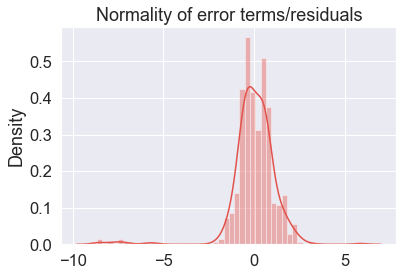

In [21]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Error terms are normally distributed and positively skewed

Checking autocorrelation of residuals

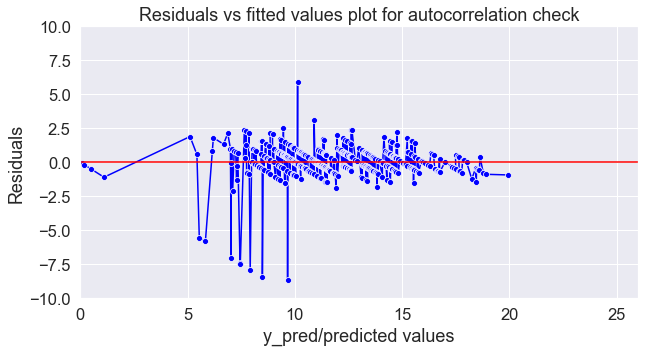

In [22]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [23]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])


0.5946056944041804

P value > 0.05 ,Null hypothesis failed to reject.

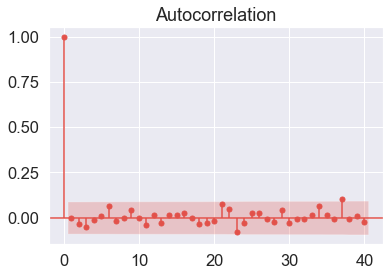

In [24]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

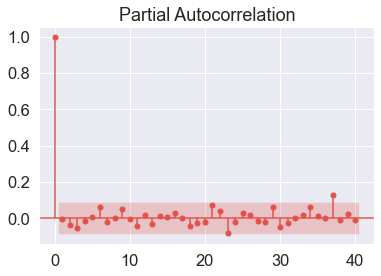

In [25]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()


There are possibilities of autocorelation as there are spikes outside the red confidence interval region

Checking Multicollinearity

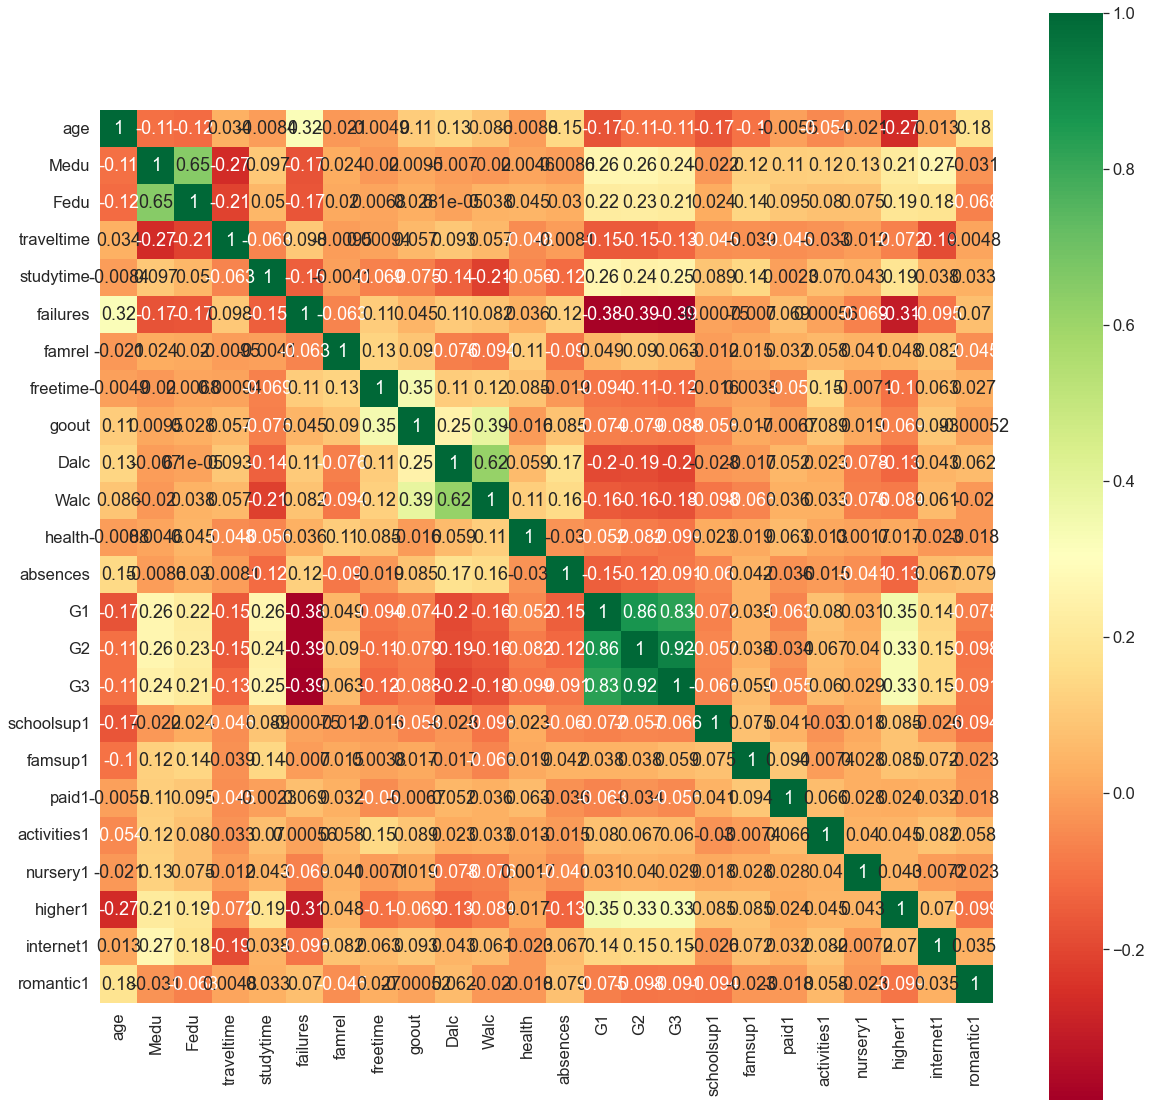

In [27]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(s_data.corr(), annot=True,cmap='RdYlGn',square=True)  

In [30]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(x_train,y_train)
d_y_pred = dtree.predict(x_train)
print("Accuracy: {}".format(dtree.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=d_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [31]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(x_train,y_train)
rf_tree_y_pred = rf_tree.predict(x_train)
print("Accuracy: {}".format(rf_tree.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9686897738584267
R squared: 0.9686897738584267


In [32]:
# SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
svr_y_pred = svr.predict(x_train)
print("Accuracy: {}".format(svr.score(x_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.7766106396492168
R squared: 0.7766106396492168
